In [5]:
import numpy as np
import seaborn as sns

from scipy.stats import skew, kurtosis
from src.universe import Universe

In [2]:
inception_date = '2022-03-31'
ONE_YEAR_TRADE_DAYS = 252
TWO_YEAR_TRADE_DAYS = ONE_YEAR_TRADE_DAYS * 2
WIN_LEN = 30
UNIVERSE_SIZE = 2500
EPOCH = 20
BATCH_SIZE = 16

In [3]:
universe = Universe()
liquid_ticker_ret = universe.get_liquid_ticker_return(inception_date)

/Users/guzhicheng/Desktop/HKUST_course/Spring/6000M/proj2/src/universe.py:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  universe = pd.read_csv(self._root / f'{inception_date}.csv', squeeze=True)
100%|██████████| 2500/2500 [00:06<00:00, 370.71it/s]


<Axes: ylabel='Density'>

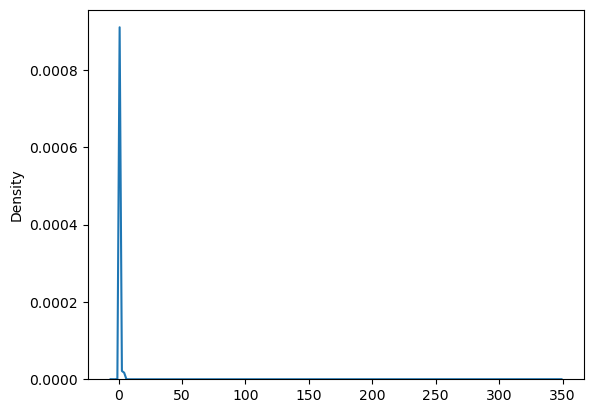

In [6]:
ret_train = liquid_ticker_ret.loc[:inception_date].iloc[-TWO_YEAR_TRADE_DAYS-WIN_LEN:]
train_index = ret_train.loc[:inception_date].iloc[-TWO_YEAR_TRADE_DAYS:].index
train_flat = ret_train.values.flatten()
train_flat = train_flat[train_flat != 0]
sns.kdeplot(train_flat)

In [7]:
skew(train_flat), kurtosis(train_flat, fisher=True)

(925.5984680449808, 932863.0520740927)

<Axes: ylabel='Density'>

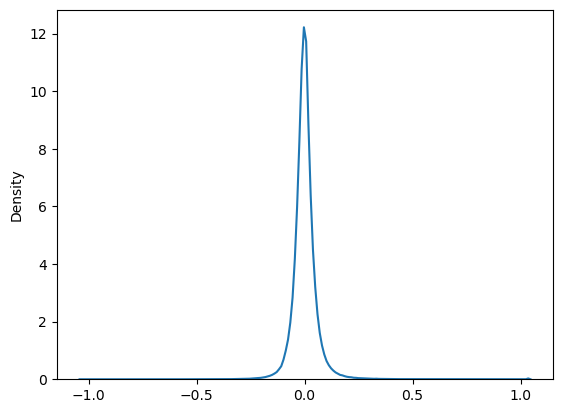

In [8]:
## clip data to reduce outliers effect
m = train_flat.mean()
s = train_flat.std()
train_flat = train_flat.clip(m-3*s, m+3*s)
sns.kdeplot(train_flat)

In [9]:
skew(train_flat), kurtosis(train_flat, fisher=True)

(3.0721249044539727, 49.61270958237107)

<Axes: ylabel='Density'>

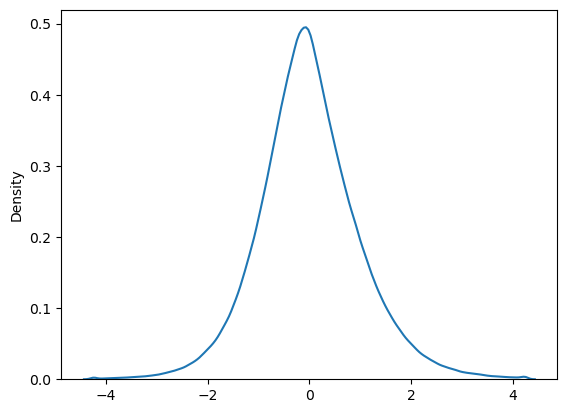

In [14]:
### standardize the return using rolling mean and std of 20d
ret_mean_roll = liquid_ticker_ret.rolling(20).mean()
ret_std_roll = liquid_ticker_ret.rolling(20).std()
ticker_ret_roll = (liquid_ticker_ret - ret_mean_roll) / (ret_std_roll + 1e-6)

ret_train_roll = ticker_ret_roll.loc[:inception_date].iloc[-TWO_YEAR_TRADE_DAYS-WIN_LEN:]
ret_roll_flat = ret_train_roll.values.flatten()
ret_roll_flat = ret_roll_flat[ret_roll_flat != 0]
sns.kdeplot(ret_roll_flat)

In [16]:
skew(ret_roll_flat), kurtosis(ret_roll_flat, fisher=True)

(0.2408652777649997, 1.2075487589111722)

<Axes: ylabel='Density'>

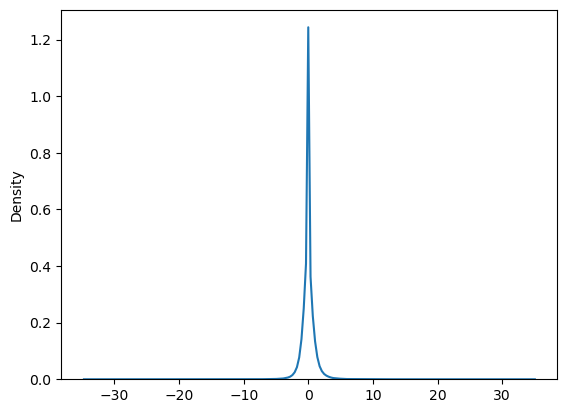

In [15]:
### standardize the return using rolling mean and std of 20d
ticker_ret_transform = (liquid_ticker_ret - liquid_ticker_ret.mean()) / (liquid_ticker_ret.std() + 1e-6)

ret_train_transform = ticker_ret_transform.loc[:inception_date].iloc[-TWO_YEAR_TRADE_DAYS-WIN_LEN:]
ret_train_flat = ret_train_transform.values.flatten()
ret_train_flat = ret_train_flat[ret_train_flat != 0]
sns.kdeplot(ret_train_flat)

In [17]:
skew(ret_train_flat), kurtosis(ret_train_flat, fisher=True)

(2.525702256973998, 59.63588652265847)